# Import libraries

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact

In [2]:
def fire_bounds(img, kernel_opening=5, kernel_closing=5):
    global masked_img
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_blue= np.array([200,0,0])
    upper_blue = np.array([255,255,255])

    mask = cv2.inRange(hsv,lower_blue,upper_blue)
    
    kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_opening, kernel_opening))
    opening = cv2.morphologyEx(masked_img, cv2.MORPH_OPEN, kernel_open)
    
    kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_closing, kernel_closing))
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_close)
    
    masked_with_morpho = cv2.multiply(masked_img, (closing//255))



    fig, ax = plt.subplots(1,3, figsize = (15,5))
    ax[0].imshow(np.squeeze(mask),'binary')
    ax[0].set_title('masked img')
    ax[1].imshow(np.squeeze(opening), 'binary')
    ax[1].set_title('opening')
    ax[2].imshow(np.squeeze(closing), 'binary')
    ax[2].set_title('closing')
    
    for axs in ax:
        axs.axis('Off')

In [3]:
DATA_DIR = '/home/victor/Mestrado/Disciplinas/Visão Computacional/Projeto Final/bowfire/BowFire'
IMG_DIR = os.path.join(DATA_DIR, 'images')
MASK_DIR = os.path.join(DATA_DIR, 'masks')

In [4]:
list_imgs = [os.path.join(IMG_DIR, x) for x in os.listdir(IMG_DIR)]
list_masks = [os.path.join(MASK_DIR, x) for x in os.listdir(MASK_DIR)]

list_imgs = sorted(list_imgs)
list_masks = sorted(list_masks)

print('Total de imagens', len(list_imgs))
print('Total de máscaras', len(list_masks))

Total de imagens 119
Total de máscaras 119


interactive(children=(IntSlider(value=59, description='count', max=119), IntSlider(value=10, description='kern…

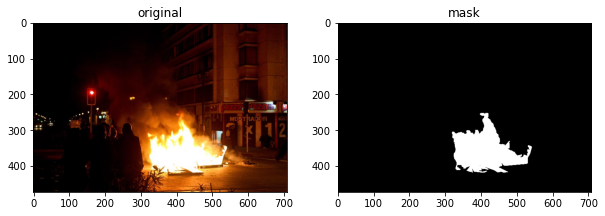

In [5]:
@interact(count = (0, len(list_imgs)), kernel_opening = (1,20,1), kernel_closing = (1,20,1))
def view_images(count, kernel_opening, kernel_closing):
    global img
    global mask
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    img = plt.imread(list_imgs[count])
    mask = plt.imread(list_masks[count])
    
    ax[0].imshow(img)
    ax[0].set_title('original')
    ax[1].imshow(mask)
    ax[1].set_title('mask')
    
    fire_bounds(img, kernel_opening, kernel_closing)
    
    for axs in ax:
        axs.axis('Off')